<a href="https://colab.research.google.com/github/PestanaSH/Machine-Learning-Studies/blob/main/K_means_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Padronizacao (Scaling)
# Garante que ambas as features contribuam igualmente para o calculo da distancia.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados prontos para o Elbow Method!")

Dados prontos para o Elbow Method!


In [5]:
# Lista para armazenar o WCSS (Within-Cluster Sum of Squares) para cada K
wcss = []

# Testamos K de 1 ate 10
for i in range(1, 11):
  # Instancia o modelo K-means
  # O random_state garante que os resultados sejam reproduziveis
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

  kmeans_model.fit(X_scaled)

  # Adiciona a inercia (WCSS) a lista
  wcss.append(kmeans_model.inertia_)

print("Calculo do WCSS concluido para K de 1 a 10.")

Calculo do WCSS concluido para K de 1 a 10.


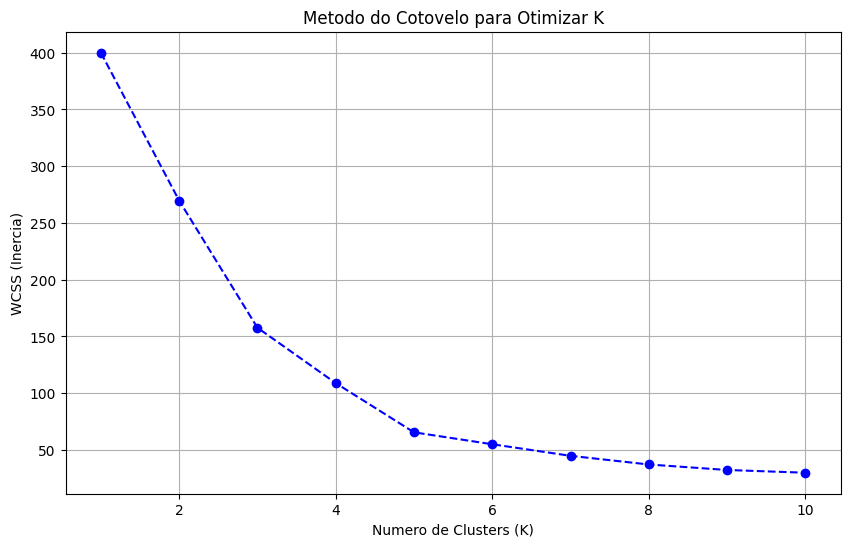

Grafico do Cotovelo gerado.


In [6]:
# Cria o grafico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Metodo do Cotovelo para Otimizar K')
plt.xlabel('Numero de Clusters (K)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

print("Grafico do Cotovelo gerado.")

In [7]:
K_ideal = 4

# Instancia e treina o modelo final
kmeans_final = KMeans(n_clusters=K_ideal, init='k-means++', random_state=42, n_init=10)

# Atribui o rotulo do cluster a cada ponto (cliente)
# O fit_predict faz o treinamento e retorna os rotulos (0, 1, 2, 3)
clusters = kmeans_final.fit_predict(X_scaled)

# Adiciona a coluna de clusters de volta ao Dataframe original
# Isso eh essencial para a analise de dados brutos e a visualizacao
df['Cluster'] = clusters

print(f"O K-Means foi executado com K={K_ideal}. Os rotulos de cluster foram adicionados ao DataFrame.")

O K-Means foi executado com K=4. Os rotulos de cluster foram adicionados ao DataFrame.


In [9]:
# Agrupa o DataFrame pela nova coluna 'Cluster' e calcula a media das features
cluster_medias = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

print("\n--- Medias das Variaves por Cluster")
print(cluster_medias)


--- Medias das Variaves por Cluster
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 26.304348               20.913043  45.217391
1                 87.000000               18.631579  40.394737
2                 48.260000               56.480000  39.200000
3                 86.538462               82.128205  32.692308


In [12]:
!pip install seaborn

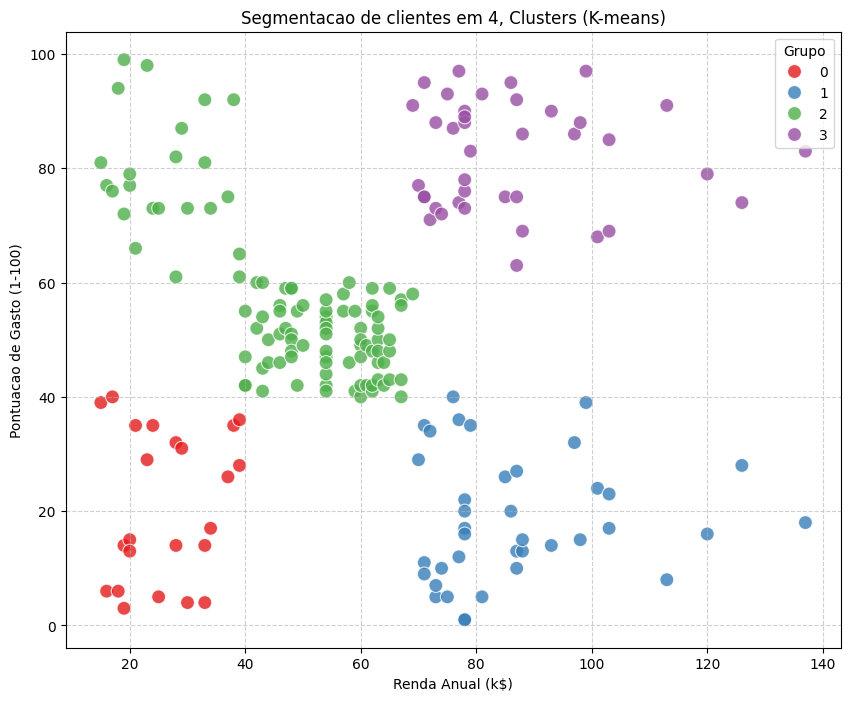

In [13]:
import seaborn as sns # Importa o seaborn para graficos mais bonitos

plt.figure(figsize=(10, 8))

# Cria a grafico de dispersao, colorindo os pontos pela coluna 'Cluster'
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df,
    hue='Cluster',
    palette='Set1',
    s=100,
    alpha=0.8
)

# Adiciona os centroides (que devem ser convertidos para a escala original se usados)
# Para simplificar, focaremos apenas nos pontos dos clientes.

plt.title(f"Segmentacao de clientes em {K_ideal}, Clusters (K-means)")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Pontuacao de Gasto (1-100)")
plt.legend(title='Grupo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()